$\color{green}{\text{This notebook is best viewed in jupyter lab/notebook. You may also choose to use Google Colab but some parts of the images/colouring will not be rendered properly.}}$

# Lab 4 (Weeks 10,11): Linear Regression

<div class="alert alert-block alert-info">
<b>Enter you credentials below</b>

- <b>Student Name:</b> James Slatter
- <b>Student ID:</b> 33890552
- <b>Date:</b> May 20, 2022
</div>

## Linear Regression

_Linear regression_, as the name implies, finds the _best fit line_ (or plane/hyperplane in high-dimensional spaces) between the _independent_ and _dependent_ variable (i.e., input data and target output). Recall that we approached the univariate linear regression in the class first and built our way up to multivariate input/output forms. Univariate linear regression describes the situation where only one independent variable is presented (i.e., $x \in \mathbb{R}$) and the model has to find the linear relationship of it with the dependent variable (i.e., $y$). In the multivariate form, we have more than one independent variable (i.e., $\boldsymbol{x} \in \mathbb{R}^n$) and the model may have multiple outputs to predict (i.e., $\boldsymbol{y} \in \mathbb{R}^p$). <br> 
If you want to have a quick wrap-up, check the following Wikipedia article:
[Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)

<!-- <p float="left">
    <img src="img/linear_regression_s.png" alt="LR_s" width="49%"/>
    <img src="img/linear_regression_m.png" alt="LR_m" width="49%"/> 
</p> -->
<p float="center">
    <img src="img/linear_regression_both.png" alt="LR_s" width="100%"/>
    <br>
Figure:  <em>Simple Linear Regression (left)</em> &emsp; vs. 
&emsp; <em>Multiple Linear Regression (right)</em>
</p>

As shown in the figure, linear regression can be understood as finding the _best-fitting straight line_ (or _plane_ in multidimensional cases) through the training examples. This best-fitting line is also called the **regression line**, and the vertical lines from the regression line to the training examples are the so-called **offsets** or **residuals** — the errors of our prediction.


## What you are going to do in this lab exercise!

In this laboratory exercise, you will create a program to find the linear relationship between the dependent and independent variable(s). <br> In all of the tasks below, you **may not** use any pre-written libraries for linear regression functions (e.g. <span style="color:red"> no </span> scikit-learn), instead you should use your knowledge of python and numpy to build your own code. 

<div class="alert alert-block alert-warning">
    
- **Tasks 1 & 2** :  Perform linear regression on data from a study on life expectancy around the globe. We will use this data to understand how linear regression works. The great thing here is that we use some actual real data instead of synthetic one!
- **Tasks 3, 4 & 5** :  Restore faces from corrupted images. We will use linear regression in order to restore images. You will be amazed at what you can achieve with linear regression, once you’ve properly modelled a problem.
    
</div>

In [1]:
# As always, we first import several libraries that will be helpful to solve the tasks
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

## Task 1: Simple Linear Regression
We begin with a simple example of univariate linear regression. Suppose that we are statistical consultants and want to investigate the factors (i.e. Alcohol, BMI, GDP) affecting life expectancy. We will seek to fit a univariate linear regression model, with _'Life expectancy'_ as the response $y$ and '_Alcohol, BMI,_ or _GDP_' as the input $x$.

The linear relationship between $x$ and $y$ can be written as:
\begin{equation}
    y \approx w[0] + w[1] x \tag{1}\;.
\end{equation}


<div class="alert alert-block alert-info">
    
#### In this task, you will work on the following points:
 1. From the provided files, use Alcohol data as $x$ to predict life expectancy as $y$. Write your own **linearRegression\_cof()** function, which takes $\boldsymbol{X} \in \mathbb{R}^{m \times n}$ and $\boldsymbol{Y} \in \mathbb{R}^{m \times p}$ to compute the optimal parameter of the model coefficients $\boldsymbol{w} = \big(w[0],w[1]\big)^\top$. Here $m$ is the number of data samples we have, $n$ is the dimensionality of input $\boldsymbol{x}$ and $p$ is the dimensionality of target $\boldsymbol{y}$. <br>You may **not** use  pre-existing linear regression functions (e.g., the one from scikit-learn). <br>
    Recall that the solution of linear regression can be written as
\begin{align}
    {\boldsymbol{W}}^\ast = (X^{\top}X)^{-1}X^{\top}Y \;. \tag{2}
\end{align}
Recall that $\boldsymbol{X}$ is a matrix where data points are stacked in its rows (each row is one data point). Similarly, $\boldsymbol{Y}$ is a matrix where its rows store the desired output of the model. Since we use only Alcohol as $x$, then $n=1$. Also, since we are only interested in predicting the life expectancy, $p=1$. <br>
    **Hint**: You need to include a bias term in your model (i.e., $w[0]$). As discussed in the class (see Section 2.2 in the lecture notes), you just need to augment your data by adding a column of ones to the matrix $\boldsymbol{X}$ (add it from the left so the first element of your weight vector shows the bias).

    
 2. Obtain and print the coefficients $w[0], w[1]$ for the _Alcohol_ input.
    

 3. Repeat the previous steps, but this time consider _BMI_ as input $x$.  
     
  
 4. Write a function **predict()**, which takes a data point $\boldsymbol{x}_q$ and coefficients $\boldsymbol{w}$ and returns the prediction $\hat{y} = \boldsymbol{w}^\top \boldsymbol{x}_q$. <br>
**Hint:** Again you need to be careful about how you use the bias term $w[0]$. One possible solution is to always augment $\boldsymbol{x}_q$ with a constant feature 1 and then forming $\hat{y}_q = \boldsymbol{w}^\top \boldsymbol{x}_{q,\text{aug}}$, where we denote the augmented  $\boldsymbol{x}_{q}$ by $\boldsymbol{x}_{q,\text{aug}}$. Needless to say, you need to put the constant feature 1 at the correct location (so if you augment from left, meaning you add a 1 as the very first element of each training sample $x$, then you need to do the same with $x_q$). 
        
        
 5. Use this predict() function to plot $y = $ 'Life expectancy'  against $x =$ 'Alcohol' and  $x =$ 'BMI' on your training data. Display the original data as a scatter plot together with your predicted best-fit line.
    
    
 6. Judging by your visualisations of the data and the regression line, can you explain what the results would mean if you had to use this model to make a prediction? Does the dependency seem reasonable to you, and why / why not? What could be the reason for this dependency in the data? 

**Loading the data**

In [2]:
# === Task1 ===
# Alcohol data: task1_alc.npy
# BMI data:     task1_bmi.npy
# GDP data:     task1_gdp.npy
# Life expect.: task1_lifeexpt.npy

# Load data from drive
X_alc = np.load('data/task1_alc.npy')
X_bmi = np.load('data/task1_bmi.npy')
X_gdp = np.load('data/task1_gdp.npy')
Y = np.load('data/task1_lifeexpt.npy')

#### 1. Regression function

In [ ]:
def linearRegression_cof(X, Y):
    
    # You should write this linearRegression_cof function based on the multivariate case, so you can use it for later tasks (ie. tasks 2-3)
    # Inputs: X - For a univariate case, this will be m * 1, for multivariate, this will be m * n
    #         Y - For a univariate case, this will be m * 1, for multivariate, this will be m * p
    m = X.shape[0]
    n = X.shape[1] if len(X.shape) > 1 else 1
    p = Y.shape[1] if len(Y.shape) > 1 else 1
    a0 = 
    # Output: The coefficients of the linear regression model

    ## HINT!! You may want to use the pseudo-inverse (pinv) instead of calculating for the inverse directly. This will resolve any singular matrix issues in later tasks

    return 


m: 73, n: 1, p: 1


#### 2. Obtaining regression coefficients for _Alcohol_

_Hint: You need to ensure you add in a bias term, we won't remind you this everytime!_

In [ ]:
## Add in your code here

_Hint:_ If you wrote the function correctly, your answer for the _Alcohol_ data should be close to: $w_{0}=63.130, w_{1}=0.967$ 


#### 3. Obtaining regression coefficients for _BMI_

In [ ]:
## Add in your code here

_Hint:_ If you wrote the function correctly, your answer for the _BMI_ data should be close to: $w_{0}=60.749, w_{1}=0.191$ 

#### 4. & 5. Predicting the Life Expectancy

Write a function **predict()**, which takes a data point $\boldsymbol{x}_q$ and coefficients $\boldsymbol{w}$ and return the prediction $\hat{y} = \boldsymbol{w}^\top \boldsymbol{x}_q$.

In [ ]:
def predict(X, w):
    
    # This is for a univariate case
    # Inputs: x - input data
    #         w - Coefficients for the linear regression model
    # Output: The predicted values based on x and w 
    
    return 

Now, we will use this **predict()** function to plot Y = 'Life expectancy' against the predictor X = 'Alcohol' and 'BMI'. You are asked to display both the original data as a scatter plot and your predicted best fit line.

In [ ]:
#Display the scatter results


#### 6. Data interpretation

<div class="alert alert-block alert-success"> 
 
#### Judging by your visualisations of the data and the regression line, can you explain what the results would mean if you had to use this model to make a prediction? Does the dependency seem reasonable to you, and why / why not? <br> What could the reason for this dependency in the data be?
    
Write your answers here
    
</div>


## Task 2: Multivariate Linear Regression

In this task, you will extend your program to fit a multivariate linear regression model. We again use Linear Regression to fit a model but this time with three features $x[1]=$ BMI, $x[2]=$ Alcohol, and $x[3]$= GDP. That is, 

\begin{equation}
    y \approx w[0] + w[1] x[1] + w[2] x[2] + w[3] x[3] \;. \tag{3}
\end{equation}


<div class="alert alert-block alert-info">
    
**In this task, you will work on the following points**:
    
 1. Extend your program to fit your regression model to the afore-described combination of _BMI_, _Alcohol_ and _GDP_ data loaded in Task 1. Print your results for the obtained regression coefficients $\boldsymbol{w}^\ast = \big(w[0], w[1], w[2], w[3]\big)^\top$.

 2. Now, we are intersted in evaluating the performance of our linear regression model. 
Up to now, we have fit a regression model on training data. Let’s see how good our model is when it comes to data that it hasn’t seen during training. Here we will test our linear model with data from Australia.<br>
For this, you will need to write a function **compute_sse()**, which computes the error as:
    
\begin{align}
    \boldsymbol{L}_\text{SSE} =\sum_{q} \big\|y_{q} - \boldsymbol{w}^\top \boldsymbol{x}_{q} \big\|^2\;. \tag{4}
\end{align}
 
 3. Evaluating the predictions on unseen test data from year=2002, country=Australia, measure and discuss the following:
    
    a) What is $\boldsymbol{L}_\text{SSE}$ if we only use $X$=BMI to train our model?
        
    b) What is $\boldsymbol{L}_\text{SSE}$ if we only use $X$=BMI,  $X_2$=Alcohol, and $X_3$=GDP to train our model?

    c) Thinking back to Task 1: If you could only choose **one** feature, either $X$=BMI **or** $X$=Alcohol, which one would you choose to make a prediction? Explain your reasoning.
    
    d) Of you wanted to predict  GDP from $X$=BMI, and  $X_2$=Alcohol, what would you do? 
</div>

#### 1. Obtaining coefficients for multiple linear regression (on training data from Task 1)

_Hint: Don't forget to add in the bias term!_

_Hint:_ If you wrote the function correctly, your results should be close to: $w_{0}=61.075, w_{1}=0.154, w_{2}=0.690, w_{3}=-0.005$ 

#### 2. Computing the Error to evaluate the performance of the linear regression models

In [ ]:
#Compute the sum squared error
def compute_sse(y_estimate, y): 
    
    # Inputs: y_estimate is your estimated y from your linear regression model
    #         y is your actual y 
    # Output: Return your sum squared error
    
    
    return 

#### 3. Evaluating on unseen test data

In [3]:
# Load the test data for this task: Australia, year 2002
# Test BMI data:     task2_AU2002_test_bmi.npy
# Test Alcohol data: task2_AU2002_test_alc.npy
# Test GDP data:     task2_AU2002_test_gdp.npy
# Test Life expect.: task2_AU2002_test_lifeexpt.npy

# Important: Be careful NOT to confuse your training and test data! 
# Training data is for fitting the model, test data for evaluation only!

# Load the test data from drive
X_bmi_test = np.load('data/task2_AU2002_test_bmi.npy')
X_alc_test = np.load('data/task2_AU2002_test_alc.npy')
X_gdp_test = np.load('data/task2_AU2002_test_gdp.npy')
Y_test = np.load('data/task2_AU2002_test_lifeexpt.npy')

##### a) $L_{\text{SSE}}$ when trained on $X=$ 'BMI'  (Coeficients from Task 1)

In [ ]:
# Show your SSE value

##### b) $L_{\text{SSE}}$ when trained on $X_1=$ 'BMI', $X_2=$ 'Alcohol' and $X_3=$ 'GDP'  

In [ ]:
# Show your SSE value

##### c) Question

<div class="alert alert-block alert-success"> 
 
#### Thinking back to Task 1: If you could only choose **one** feature, either $X$=BMI **or** $X$=Alcohol, which one would you choose to make a prediction? Why? Explain your reasoning!
    
Write your answer here
    
</div>



##### d) Question

<div class="alert alert-block alert-success"> 
 
#### If you wanted to predict 'GDP' from $X_1=$ 'BMI' and $X_2=$ 'Alcohol', what would you do? Explain your reasoning and the steps to take.
    
Write your answer here
    
</div>

    
## Task 3: Image restoration of human face pictures
In the following tasks, you will now use your knowledge of linear regression together with the functions you implemented in the previous tasks to 'complete' or 'restore' images that have been corrupted. 

We will work with a subset of the well-known Labeled Faces in the Wild (LFW) [dataset](http://vis-www.cs.umass.edu/lfw/) that comprises a selection of images depicting the faces of various celebritries. Our selected data set consists of a total number of 273 images, each with height 62px and width 47px. This data is split into 185 training and 88 test images.

<div class="alert alert-block alert-info">
    
#### In this task, you will work on the following four points:
 1. Load _'train_face_crpt.npy'_ & _'train_face_clean.npy'_ as your training data set, and _'test_face_crpt.npy'_ & _'test_face_clean.npy'_ as your test data set. Display an example image from the corrupted training set (_'train_face_crpt.npy'_) and the corrupted test set (_'test_face_crpt.npy'_) side-by-side to check the correct data import and to see what you're going to work with. <br> 
    Depending on your knowledge of celebrities, you might notice that it is quite hard to identify the person on the image, since 50% of the pixels have been corrupted! So let's reconstruct the missing data to find out who it is!
 
 2. Write a Linear Regression function _'regression_fit()'_ to fit a model using the data of the training set. Your function should take the corrupted and the uncorrupted images of your training set as arguments (you try to predict the clean image from the corrupted one).) <br>
    Note that you should re-use your previously developed _'linearRegression\_cof()'_ function from Task 1. You may **not** use pre-implemented functions from external libraries that perform linear regression! (Mathematical operations from numpy are allowed)
 
 3. To check how well your model works on unseen data, you will now use the optimised regression model to predict the missing pixels of the faces from the unseen test set (i.e., perform 'image completion'). Your _'predict()'_ function will take in the corrupted samples and regression coefficients and return the restored images. <br>
    For the 9th image of the test set (i.e., image[8]), display the uncorrupted version, the corrupted version and your reconstructed one side-by-side to compare!
 
 4.  Repeat step 3 for the training images, i.e., perform image completion, and display the results for the 6th image of the training set (i.e., image[5]) in the same side-by-side way as before.

 5.  What do you observe if you compare the image quality of the restored test image to the restored training image? Why does our regression model perform differently for these two sets? 
</div>

#### 1. Loading and displaying data

We have a total of 185 training images, each with height 62px and width 47px.


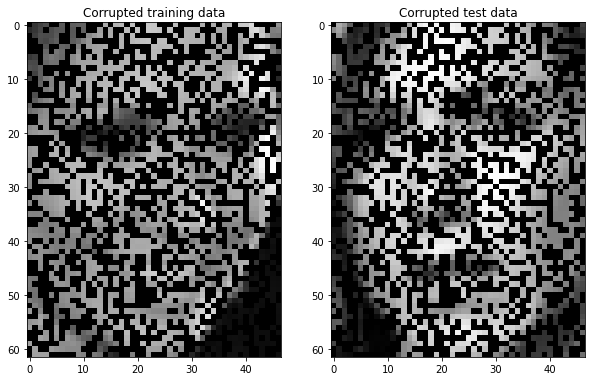

In [4]:
# ===Task3===
# Training set: Original images:    train_face_clean.npy
# Training set: Corrupted images:   train_face_crpt.npy
# Test set: Original images:        test_face_clean.npy
# Test set: Corrupted images:       test_face_crpt.npy

# Load data from drive
train_imgs_crpt = np.load('data/train_face_crpt.npy')
train_imgs_clean = np.load('data/train_face_clean.npy')
test_imgs_crpt = np.load('data/test_face_crpt.npy')
test_imgs_clean = np.load('data/test_face_clean.npy')

# Lets see what the corrupted training data looks like
# --> Visualise e.g. img[5] of the corrupted train and img[8] of the corrupted test set (but feel free to check others as well)
fig, (ax0, ax1 )= plt.subplots(1,2, figsize = (10,20))
ax0.imshow(train_imgs_crpt[5], cmap="gray")
ax0.title.set_text("Corrupted training data")
ax1.imshow(test_imgs_crpt[8], cmap="gray")
ax1.title.set_text("Corrupted test data")

n_samples, h, w = train_imgs_crpt.shape
print(f'We have a total of {n_samples} training images, each with height {h}px and width {w}px.')

#### 2. Fitting the regression model / Determining the parameters

In [ ]:
# Implement regression_fit() 
def regression_fit(samples_X, samples_Y):
    # input arguments: 
    #    samples_X: training samples
    #    samples_Y: training 'labels' (uncorrupted samples)
    # output:
    #    reg_cof: regression coefficients (parameters)
    
    # You may choose to call your linearRegression_cof function from task 1 if you already implemented a multivariate case
    
    return 

In [ ]:
# Retrieve the regression parameters


#### 3. Completing the corrupted images of the unseen test data by using linear regression to predict the missing pixels

In [ ]:
# Predict the missing pixels for all test images
def predict(samples, reg_cof):
    
    # Remember, we are dealing with the case where we have multivariate inputs AND outputs (so each pixel has its own output value) 
    
    # input arguments: 
    #    samples: np.array with image data, shape (N, h, w)
    #    reg_cof: regression coefficients / parameters
    # output:
    #    recon_samples: np.array with image data, shape (N, h, w)

    return recon_samples_res

In [ ]:
# Predict / Restore images of the test set


# Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
# (Side-by-side plot of all three images: 'Clean test img', 'Corrupted test img', 'Restored test img')



#### 4. Completing the corrupted training images via linear regression

In [ ]:
# Predict / Restore images of the training set


# Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
# (Side-by-side plot of all three images: 'Clean train img', 'Corrupted train img', 'Restored train img')


<div class="alert alert-block alert-success"> 
 
#### What do you observe if you compare the image quality of the restored test image to the restored training image? Why does our regression model perform differently for these two sets?
    
Write your answer here
    
</div>

## Task 4: Peak Signal-to-Noise Ratio PSNR

The _Peak Signal to Noise Ration_ (PSNR) is defined as the ratio of the maximum possible power of a signal to the power of corrupting noise that affects representation fidelity. PSNR is most easily defined via the mean squared error (MSE). Given a noise-free $m\times n$ grayscale image $I$ and its noisy approximation $K$, the $\mathrm{MSE}$ and $\mathrm{PSNR}$ are defined as

\begin{align}
    \mathrm{MSE} &= \frac{1}{mn} \sum^{m-1}_{i=0} \sum^{n-1}_{j=0} [I(i,j)-K(i,j)]^{2} \\
    \mathrm{PSNR} &= 20 \cdot log_{10}(\mathrm{MAX}_I))-10 \cdot log_{10}(\mathrm{MSE}).
\end{align}

Note that $\mathrm{MAX}_I$ denotes the maximum possible value a pixel can have.

See this [Reference](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio) for more details.



<div class="alert alert-block alert-info">
    
#### In this task, you will conentrate on the following points:
    
 1. Implement a function _'PSNR()'_ that takes in two images to measure the Peak Signal to Noise Ratio between them. In our case, we want to measure the PSNR between a reconstructed image and its original uncorrupted version. _Hint_: Make sure to convert the image intensities to integer values ([0,255]) for this computation.
 
 2. We are again considering the 9th image of the test set from Task 3 (i.e., image[8]). Use your implemented function to measure the PSNR of your restored version of this test image. Additionally compute the PSNR of the corrupted version of this image (the 'raw corrupted' test data). 
    
 3. Now, load the additionally provided data samples _'train_face_crpt_rdm.npy'_ and _'test_face_crpt_rdm.npy'_, and visualise the 6th image of this new train set (i.e., image[5]) and the 9th image of this new test set (i.e., image[8]). If you compare these two images to the ones loaded in Task 3, you will notice that this new data is almost identical to the previously used data (ignoring the uncorrupted 'frame'), but is **corrupted with a random pattern for each image**, whereas the **previously** used images were all **corrupted by the exact same pattern**. (You can check by inspecting the train and test images you displayed in Task 3). 
    
 4. Repeat the regression fitting, prediction and visualisation from Task 3 on these new data samples. <br>
  
 5. Now again, use your implemented function to measure the PSNR of your restored version of the 9th test image (i.e., image[8]) and additionally compute the PSNR of the 'randomly' corrupted version of this image (the new 'raw corrupted' test data).  <br>

 6. Compare your PSNR and visual results from step 5 with the ones from step 2! Can you explain what might have changed that led to differences between the restored images, and why this happens?
</div>

#### 1. PSNR Implementation

In [ ]:
## Implement PSNR to measure quantitative difference
def PSNR(img1, img2):
    
    # Inputs: img1 - corrupted / reconstructed image (depending on what you are calculating)
    #         img2 - clean image
    # Output: The calculated PSNR value

    return psnr

#### 2. Calculate the PSNR for the 9th test image (i.e., image[8]) from Task 3: corrupted image and restored version

In [ ]:
img_idx_test = 8
print(f'Evaluating PSNR for test image with index {img_idx_test} from Task 3.')

## Print both PSNRs for corrupted and reconstructed versions


#### 3. Load new data corrupted with random patterns
If you closely inspect the corrupted data and compare it to the one from the previous task, you will notice that apart from the obvious uncorrupted 'frame' we added, the corruption pattern now differs from image to image!

We have a total of 185 training images, each with height 62px and width 47px.


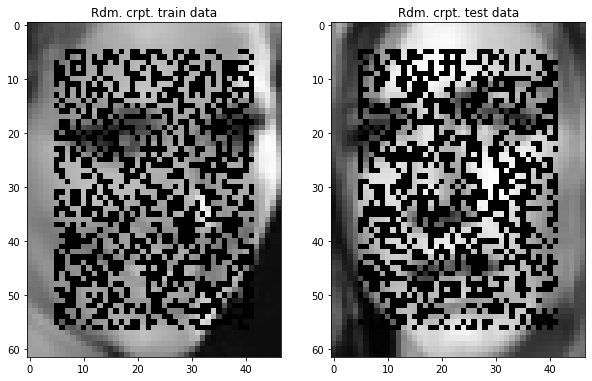

In [5]:
# Load data from drive
# Train images corrupted with random pattern: train_face_crpt_rdm.npy
# Test  images corrupted with random pattern: test_face_crpt_rdm.npy
train_imgs_crpt_rdm = np.load('data/train_face_crpt_rdm.npy')
test_imgs_crpt_rdm = np.load('data/test_face_crpt_rdm.npy')

# Lets see what the corrupted training data looks like
# --> Visualise e.g. img[5] of the corrupted train and img[8] of the corrupted test set (but feel free to check others as well)
fig, (ax0, ax1 )= plt.subplots(1,2, figsize = (10,10))
ax0.imshow(train_imgs_crpt_rdm[5], cmap="gray")
ax0.title.set_text("Rdm. crpt. train data")
ax1.imshow(test_imgs_crpt_rdm[8], cmap="gray")
ax1.title.set_text("Rdm. crpt. test data")

n_samples, h, w = train_imgs_crpt_rdm.shape
print(f'We have a total of {n_samples} training images, each with height {h}px and width {w}px.')

#### 4. Repeat regression fit and prediction on new data

In [ ]:
# Retrieve the regression coefficients to reconstruct images from corrupted ones


In [ ]:
# Predict the missing pixels for all test images


In [ ]:
# Display the reconstruction results on the randomly corrupted test images
# Use the same image index as previous task so you can directly compare the results

img_idx = 8


#### 4. Calculate the PSNR for the 9th test image (i.e., image[8]): corrupted image and restored version

In [ ]:
img_idx_test = 8

In [ ]:
print(f'Evaluating PSNR for test image with index {img_idx_test} from Task 3.')

## Show the two PSNR values for both corrupted and restored versions (for the randomly corrupted image)


##### 6. Question

<div class="alert alert-block alert-success">
    
#### Compare your PSNR and visual results from step 5 with the ones from step 2! Can you explain what might have changed that led to differences between the restored images, and why this happens?
<br><br>

    
Write your answer here

</div>



# Task 5: Reconstruction from local neighbourhood
We realised in the previous task that random corruption patterns for each image prove difficult for our naive linear regression model. In this task, we want to explore the possibility to reconstruct a corrupted pixel only from its local neighbourhood. In more detail, we will predict the value of a corrupted pixel by using a window of size $5\times 11$ directly above the pixel. (This is also the reason why our 'new' corrupted images have an uncorrupted 'frame' of 5 pixels.)

<div class="alert alert-block alert-info">
    
#### To accomplish this task, you will concentrate on the following points:
    
 1. Write a function _'extract_patch()'_ to extract patches of a specific patch size directly above a pixel of interest.
    
 2. Use your patch extraction function to create a new training data set as follows: 
    
    a) For each corrupted pixel in the training images, extract a patch from the respective  uncorrupted training image directly above the pixel using your _'extract_patch()'_ function. 
    
    b) Additionally store the 'correct' ground-truth value of the corrupted pixel.
    
 3. Using this new data set, determine the regression parameters by fitting your linear regression model (Re-use the function implemented in Task 3).
    
 4. Choose one image from the unseen randomly corrupted test dataset and predict the missing pixels of this image using your new regression model. 

 5. Visualise your new and previous results side-by-side: Original Image, Image Corrupted with Random pattern, Image reconstructed with 'naive' linear regression model (Task 3), Image reconstructed with 'local' regression model (this task). Display the PSNR values for tasks 3 and 5 for the the 9th test image (\ie image[8])

Note that while the linear regression model in task 3 was used to predict the entire image, we are only predicting one image intensity at a time in this task (i.e. a scalar value)! <br>
    
**Hint**: Your reconstruction should start at the top left of the image, since the local window (or patch) above will be uncorrupted and can thus be used for the prediction. Store all your reconstructed image intensities directly in the image, so that you can use the reconstructed values of the first row to predict the intensities of the 2nd row, and so on. <br>
<br><br>
**Optional**: After finishing your reconstruction using the local window, you can: <br>

 6. Apply a mean filter over the reconstructed image by using _ndimage.uniform_filter()_ from the _scipy_ library
    
 7. Calculate the PSNR of the new reconstructed results and compare to the results you got in Task 4.

</div>


**Main idea** (concise): Parse the image and check for pixels whose value is exactly 0 (i.e. black corrupted pixel);  For each of these pixels, take the area right above in a 5x11 pixel region from the corresponding uncorrupted training image and add it to the samples list (like we did before with the entire images) -- the Y value is the corresponding intensity of the actual pixel to be reconstructed (also to be extracted from the clean image).

#### 1. Patch extraction
Create a function to extract a patch of size 'patch_size' (for us (5,11)) above the current pixel, symmetric to the left and right. A $5\times 11$ patch should e.g. go 5 pixels above, 5 to the left and 5 to the right of the current pixel.

In [ ]:
def extract_patch(img, row, col, patch_size):
    
    # Inputs: img - the actual image
    #         row - which row we are extracting from
    #         col - which col we are extracting from
    #         patch_size - the size of the patch that we want to extract
    # Output : The patch
    
    return 

#### 2. Extract training patches for corrupted pixels
Theoretically, we could extract a patch for each individual pixel of all images (that have a sufficiently big neighbourhood).
To reduce the use of data and speed up our computations, we will just use the first 10 images of the training set.
We will further only extract patches for pixels that are currently corrupted in these training images. Since the corruption pattern is random, this should cover a sufficient number of different pixels.

There are different ways to extract the patches, the comments below highlight one way

In [ ]:
# For all images, go through each individual image (rows and cols) and find all corrupted pixels (value == 0)
# Then, extract the 5x11 patch directly above the corrupted pixel from the same image of the uncorrupted training set, 
# and add it to the new patch-based training set X;
# For the following prediction, also store the 'true' value of the pixel we want to reconstruct in the training labels set Y 
patch_size = (5,11)


In [ ]:
# Add all the samples to an array (similar to the original training data)


#### 3. Fitting the regression model to the information of the image patches

In [ ]:
# Retrieve coefficients using our linear regression fit function from Task 3
# Retrieve the regression coefficients to reconstruct images from corrupted ones


#### 4. Prediction / Reconstruction for ONE image of your choice
Prediction function is slightly different, since we cannot just directly predict ALL y-values! To predict a y-value, we need to have access to the window of size 5x11 right above the pixel we want to reconstruct. Intuitively, this can only be done for the first row of corrupted pixels, but not further (since the windows for the 2nd row would include corrupted pixels of the first row)! --> To solve this problem, we will reconstruct the image pixel-by-pixel using the reconstructed results of row1 to reconstruct row 2, and so on.


In [ ]:
# Let's predict for one specific test image! 
img_idx_test = 8


In [ ]:
# If you do not want to overwrite the original image, it is recommended you use the .copy() method from numpy arrays

#### 5. Visualisation of the results

In [ ]:
# Visualise all approaches
# You should display at 4 images:
# The clean one (original image)
# The randomly corrupted one (original image)
# General reconstruction (from task 3)
# Local reconstruction (from task 5)



<div class="alert alert-block alert-success">
    
#### Compare the results you achieve with this local approach. What do you observe when you look at the reconstruction quality in the top half vs. the one in the lower half? Why is this the case?
<br><br>

    
Write your answer here

</div>


Show the PSNR values for tasks 3 and 5 for image[8]

#### (Optional): Further image quality improvement via averaging

In [ ]:
from scipy import ndimage

# You can use the ndimage.uniform_filter to filter the results


In [ ]:
# Visualise all approaches


<div class="alert alert-block alert-warning">
    
# <center> That is all for this Lab! Congratulations!
    
</div>